<a href="https://colab.research.google.com/github/FarnazG/DataStructure/blob/main/LinkedList_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Q1**. In an open farmland where a hare (similar as rabbit) lives, it usually sleeps in any suitable place, continually shifting from one place to another in total 10 nests labeled from 1 to 10.
But a wolf lives in the same area, hunting to check 10 nests in the manner as follows: 

-	start to check from label 1 nest
-	then skip one nest (label 2) to check label 3
-	increase skipped checking number to 2 (skip label 4 and label 5) and look for it in label 6
-	keep increasing skipped number to 3 to check label 10
-	go back to count from label 1 by increasing skipped number to 4 and so on

Write a program to help this hare to make a decision which nests are safe to sleep, maybe doesn't exist at all after the wolf checked n times

	Hint: create a circular linked list and traverse one by one circularly.



In [1]:
class Nd:
    def __init__(self, data=None):
        self.data = data
        self.checked = 0
        self.next = None


class CircularList:
    def __init__(self, data=None):
        self.head = None
        self.tail = None
        self.size = 0

    def append(self, data):
        node = Nd(data)
        if self.head:
            self.tail.next = node
            self.tail = node
        else:
            self.head = node
            self.tail = node

        self.tail.next = self.head
        self.size += 1

    def delete(self, nd):
        if nd == self.head:
            tmp = self.head
            self.tail.next = self.head.next
            tmp.next = None

    def rabbit_hole_check(self, n):
        tmp = self.head
        for i in range(0, n):
            for j in range(0,i):
                tmp=tmp.next
            tmp.checked = 1

        tmp = self.head

        safe_holes=[]
        while 1:
            if tmp.checked==0:
                safe_holes.append(tmp.data)
            tmp=tmp.next
            if tmp == self.head:
                break

        return safe_holes


cl1 = CircularList()
for i in range(1,11):
    cl1.append(i)

n = int(input("Enter the number of times the wolf checks on the holes: "))
safe_holes = cl1.rabbit_hole_check(n)

if len(safe_holes)==0:
    print("No hole is safe ...")

print("The list of safe holes: " + str(safe_holes))


Enter the number of times the wolf checks on the holes: 3
The list of safe holes: [3, 5, 6, 7, 8, 9, 10]


**Q2**. Assuming that there are two circular linked lists l & m with char type node value from 
a-zA-Z in non-descending sequence, find a function/method to extract common node 
values from both, and generate a new circular list without duplicated one

	Hint: take question 4 in HW#3 as reference 



In [2]:
class Nd:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class CircularList:
    def __init__(self, data=None):
        self.head = None
        self.tail = None
        self.size = 0

    def append(self, data):
        node = Nd(data)
        if self.head:
            self.tail.next = node
            self.tail = node
        else:
            self.head = node
            self.tail = node

        self.tail.next = self.head
        self.size += 1

    def print_LL(self):
        tmp = self.head
        print("Head->", end="")

        while 1:
            print(tmp.data, end="->")
            tmp = tmp.next

            if tmp == self.head:
                print("Head")
                break


def inList(cll, value):
    if cll.size == 0:
        return 0

    tmp = cll.head
    while 1:
        if tmp.data == value:
            return 1
        tmp = tmp.next
        if tmp == cll.head:
            break

    return 0


def common_elements(cl1, cl2):
    out = CircularList()
    h1 = cl1.head
    h2 = cl2.head

    while 1:
        # print("1: " + str(h1.data) + ", 2: " + str(h2.data))
        if h1.data == h2.data:
            if inList(out, h1.data) == 0:
                out.append(h1.data)
            h1 = h1.next
            h2 = h2.next
        elif ord(h1.data) < ord(h2.data):
            h1 = h1.next
        else:
            h2 = h2.next

        if h1 == cl1.tail or h2 == cl2.tail:
            break

    return out


cl1 = CircularList()
cl1.append('B')
cl1.append('C')
cl1.append('C')
cl1.append('W')
cl1.append('Z')
cl1.append('a')
cl1.append('c')
cl1.append('d')
cl1.append('h')
cl1.append('h')
cl1.print_LL()

cl2 = CircularList()
cl2.append('C')
cl2.append('C')
cl2.append('T')
cl2.append('Z')
cl2.append('b')
cl2.append('b')
cl2.append('c')
cl2.append('c')
cl2.print_LL()

out = common_elements(cl1, cl2)
print("\nCommon elements:")
out.print_LL()


Head->B->C->C->W->Z->a->c->d->h->h->Head
Head->C->C->T->Z->b->b->c->c->Head

Common elements:
Head->C->Z->c->Head



**Q3**. Given a circular linked list with int type value at each node, write a program to delete all  prime number nodes, such as m= Head->13->12->15->14->Head, after calling delete_prime_CLL(m), you will get Head->12->15->14->Head


In [6]:
 class Nd:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class CircularList:
    def __init__(self, data=None):
        self.head = None
        self.tail = None
        self.size = 0

    def append(self, data):
        node = Nd(data)
        if self.head:
            self.tail.next = node
            self.tail = node
        else:
            self.head = node
            self.tail = node

        self.tail.next = self.head
        self.size += 1

    def print_LL(self):
        tmp = self.head
        print("Head->", end="")
        while 1:
            print(tmp.data, end="->")
            tmp = tmp.next

            if tmp == self.head:
                print("Head")
                break


def is_prime(n):
    for i in range(2, int(n/2)):
        if n % i == 0:
            return False
    return True


def delete_prime_CLL(cll):
    tmp = cl1.tail
    while 1:
        if is_prime(tmp.next.data):
            if tmp.next == cll.head:
                cll.head = cll.head.next
            elif tmp.next == cll.tail:
                cll.tail = tmp

            t1 = tmp.next
            tmp.next = tmp.next.next
            t1.next = None
        tmp = tmp.next
        if tmp.next == cl1.head:
            break


cl1 = CircularList()
cl1.append(13)
cl1.append(12)
cl1.append(15)
cl1.append(14)
cl1.print_LL()

delete_prime_CLL(cl1)
cl1.print_LL()


Head->13->12->15->14->Head
Head->12->15->14->Head


**Q4**. Find a program to split from first N nodes into new circular linked list with int type nodes while preserving the old nodes. For instance, org = Head->2->3->4->5->6->7->8
	->Head, two new circular linked lists should be Head->2->3->4->Head and 
	Head->5->6->7->8->Head from the outputs of function call split_CLL(org, 3)


In [7]:
 class Nd:
    def __init__(self, data=None):
        self.data = data
        self.next = None


class CircularList:
    def __init__(self, data=None):
        self.head = None
        self.tail = None
        self.size = 0

    def append(self, data):
        node = Nd(data)
        if self.head:
            self.tail.next = node
            self.tail = node
        else:
            self.head = node
            self.tail = node

        self.tail.next = self.head
        self.size += 1

    def print_LL(self):
        tmp = self.head
        print("Head->", end="")
        while 1:
            print(tmp.data, end="->")
            tmp = tmp.next

            if tmp == self.head:
                print("Head")
                break


def split_CLL(cll, n):
    tmp = cll.tail

    for i in range(0, n):
        tmp = tmp.next

    cl1 = CircularList()
    cl2 = CircularList()

    cl1.head = cll.head
    cl1.tail = tmp
    cl2.head = tmp.next
    cl2.tail = cll.tail
    cl1.tail.next = cl1.head
    cl2.tail.next = cl2.head

    return cl1, cl2


cll = CircularList()
cll.append(2)
cll.append(3)
cll.append(4)
cll.append(5)
cll.append(6)
cll.append(7)
cll.append(8)

cll.print_LL()

cl1, cl2 = split_CLL(cll, 3)
print("\nC1: ", end="")
cl1.print_LL()
print("C2: ", end="")
cl2.print_LL()

Head->2->3->4->5->6->7->8->Head

C1: Head->2->3->4->Head
C2: Head->5->6->7->8->Head


**Q5**. Generate a function in clockwise rotation for each node (either char type or int type) in doubly linked list by N places, e.g. given 

    list = None<-Head<=>c<=>i<=>v<=>i>=>c->None, from function call 
    rotate_DLL(list, 3), the output will be like this 
    None<-Head<=>v<=>i<=>c<=>c>=>i->None
 


In [8]:
class Node(object):
    """ A Doubly-linked lists' node. """
    def __init__(self, data=None, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev


class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0

    def append(self, data):
        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = self.head
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node

        self.count += 1

    def print_LL(self):
        current = self.head
        print("Head", end="->")
        while current:
            print(str(current.data), end="<=>")
            current = current.next

        print("None")


def rotate_DLL(dll, n):
    dll.head.prev = dll.tail
    dll.tail.next = dll.head

    for i in range(0,n):
        dll.head = dll.head.prev
        dll.tail = dll.tail.prev

    dll.head.prev = None
    dll.tail.next = None


dll = DoublyLinkedList()
dll.append('c')
dll.append('i')
dll.append('v')
dll.append('i')
dll.append('c')

dll.print_LL()
rotate_DLL(dll, 3)
dll.print_LL()


Head->c<=>i<=>v<=>i<=>c<=>None
Head->v<=>i<=>c<=>c<=>i<=>None


**Q6**. (Bonus) Check whether there exists random pointer in doubly linked list or not and correct it by a program, as example as follows for function input and output

In [3]:
from google.colab import files
from IPython.display import Image

In [4]:
uploaded = files.upload()

Saving Picture1.png to Picture1.png


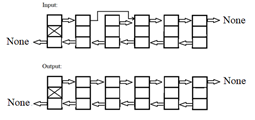

In [5]:
Image("Picture1.png")

In [9]:
class Node(object):
    """ A Doubly-linked lists' node. """

    def __init__(self, data=None, next=None, prev=None):
        self.data = data
        self.next = next
        self.prev = prev


class DoublyLinkedList(object):
    def __init__(self):
        self.head = None
        self.tail = None
        self.count = 0

    def append(self, data):
        new_node = Node(data, None, None)
        if self.head is None:
            self.head = new_node
            self.tail = self.head
        else:
            new_node.prev = self.tail
            self.tail.next = new_node
            self.tail = new_node

        self.count += 1

    def print_LL(self):
        current = self.head
        print("Head", end="->")
        while current:
            print(str(current.data), end="<=>")
            current = current.next

        print("None")

    def print_forward(self):
        current = self.head
        print("Head", end="->")
        while current:
            print(str(current.data), end="->")
            current = current.next
        print("Tail")

    def print_backward(self):
        current = self.tail
        print("Tail", end="->")
        while current:
            print(str(current.data), end="->")
            current = current.prev
        print("Head")

    def random_pointer(self):
        h = self.head
        t = self.tail
        lh = []
        lt = []
        while h:
            lh.append(h)
            h = h.next

        while t:
            lt.append(t)
            t = t.prev

        if len(lh) == len(lt):
            print("No random pointer ...")
            return False
        elif len(lh) < len(lt):
            print("Random pointer in forward pointers ...")
            for i in lt:
                if i.prev:
                    i.prev.next = i
            return True
        elif len(lt) < len(lh):
            print("Random pointer in backward pointers ...")
            for i in lh:
                if i.next:
                    i.next.prev = i
            return True


dll = DoublyLinkedList()
dll.append(1)
dll.append(2)
nd1 = dll.tail
dll.append(3)
dll.append(4)
dll.append(5)
nd1.next = dll.tail
dll.append(6)

print("Forward and backward print")
dll.print_forward()
dll.print_backward()
print("")
rp = dll.random_pointer()
if rp is True:
    print("Forward and backward print after the fix")
    dll.print_forward()
    dll.print_backward()

print("\n------------------------")

dll2 = DoublyLinkedList()
dll2.append(10)
dll2.append(20)
nd2 = dll2.tail
dll2.append(30)
dll2.append(40)
dll2.append(50)
dll2.tail.prev = nd2
dll2.append(60)
print("Forward and backward print ")
dll2.print_forward()
dll2.print_backward()
print("")
rp = dll2.random_pointer()
if rp is True:
    print("Forward and backward print after the fix")
    dll2.print_forward()
    dll2.print_backward()

Forward and backward print
Head->1->2->5->6->Tail
Tail->6->5->4->3->2->1->Head

Random pointer in forward pointers ...
Forward and backward print after the fix
Head->1->2->3->4->5->6->Tail
Tail->6->5->4->3->2->1->Head

------------------------
Forward and backward print 
Head->10->20->30->40->50->60->Tail
Tail->60->50->20->10->Head

Random pointer in backward pointers ...
Forward and backward print after the fix
Head->10->20->30->40->50->60->Tail
Tail->60->50->40->30->20->10->Head
